<a href="https://colab.research.google.com/github/DhrubaAdhikary/ERA_V2/blob/master/S7/Net1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [2]:
!git clone https://github.com/DhrubaAdhikary/ERA_V2.git

Cloning into 'ERA_V2'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 164 (delta 70), reused 103 (delta 33), pack-reused 0
Receiving objects: 100% (164/164), 24.76 MiB | 22.37 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [3]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from ERA_V2.S7.model import Net1
from ERA_V2.S7.utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda")
model = Net1().to("cuda")
model=model
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,320
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 32, 22, 22]           4,640
              ReLU-8           [-1, 32, 22, 22]               0
       BatchNorm2d-9           [-1, 32, 22, 22]              64
           Conv2d-10           [-1, 32, 11, 11]           1,056
           Conv2d-11             [-1, 16, 9, 9]           4,624
             ReLU-12             [-1, 16, 9, 9]               0
      BatchNorm2d-13             [-1, 16, 9, 9]              32
           Conv2d-14             [-1, 1

CODE BLOCK: 3

In [8]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [9]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 135647577.62it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 40993466.61it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 41684596.45it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11153705.37it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [10]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

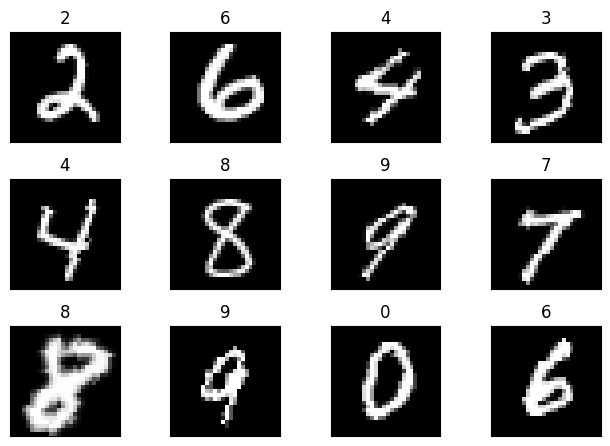

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [12]:
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0862, Accuracy: 9758/10000 (97.58%)

Epoch 2


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0503, Accuracy: 9849/10000 (98.49%)

Epoch 3


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0332, Accuracy: 9908/10000 (99.08%)

Epoch 4


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0372, Accuracy: 9891/10000 (98.91%)

Epoch 5


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0296, Accuracy: 9910/10000 (99.10%)

Epoch 6


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0208, Accuracy: 9931/10000 (99.31%)

Epoch 7


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0202, Accuracy: 9938/10000 (99.38%)

Epoch 8


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0199, Accuracy: 9938/10000 (99.38%)

Epoch 9


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0193, Accuracy: 9941/10000 (99.41%)

Epoch 10


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0186, Accuracy: 9939/10000 (99.39%)

Epoch 11


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0187, Accuracy: 9940/10000 (99.40%)

Epoch 12


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0185, Accuracy: 9941/10000 (99.41%)

Epoch 13


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0184, Accuracy: 9941/10000 (99.41%)

Epoch 14


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0185, Accuracy: 9943/10000 (99.43%)

Epoch 15


  0%|          | 0/118 [00:00<?, ?it/s]

Test set: Average loss: 0.0185, Accuracy: 9942/10000 (99.42%)



**Target**
1. Set up a model structure, borrowed from previous exercise
2. Basic code from the previous exercise
3. CenterCrop as transform

**Results**
1. Train Acc: 99.31
2. Test Acc: 99.44
3. Parameters: 20k

**Analysis**
1. The model does achieve the target of 99.4% accuracy and is consistent too.
2. The model is under-fitting without any drop-out, our transform seems to be doing a good job making the training hard.
3. Let's see what the model can do with the least parameters setup.

[]

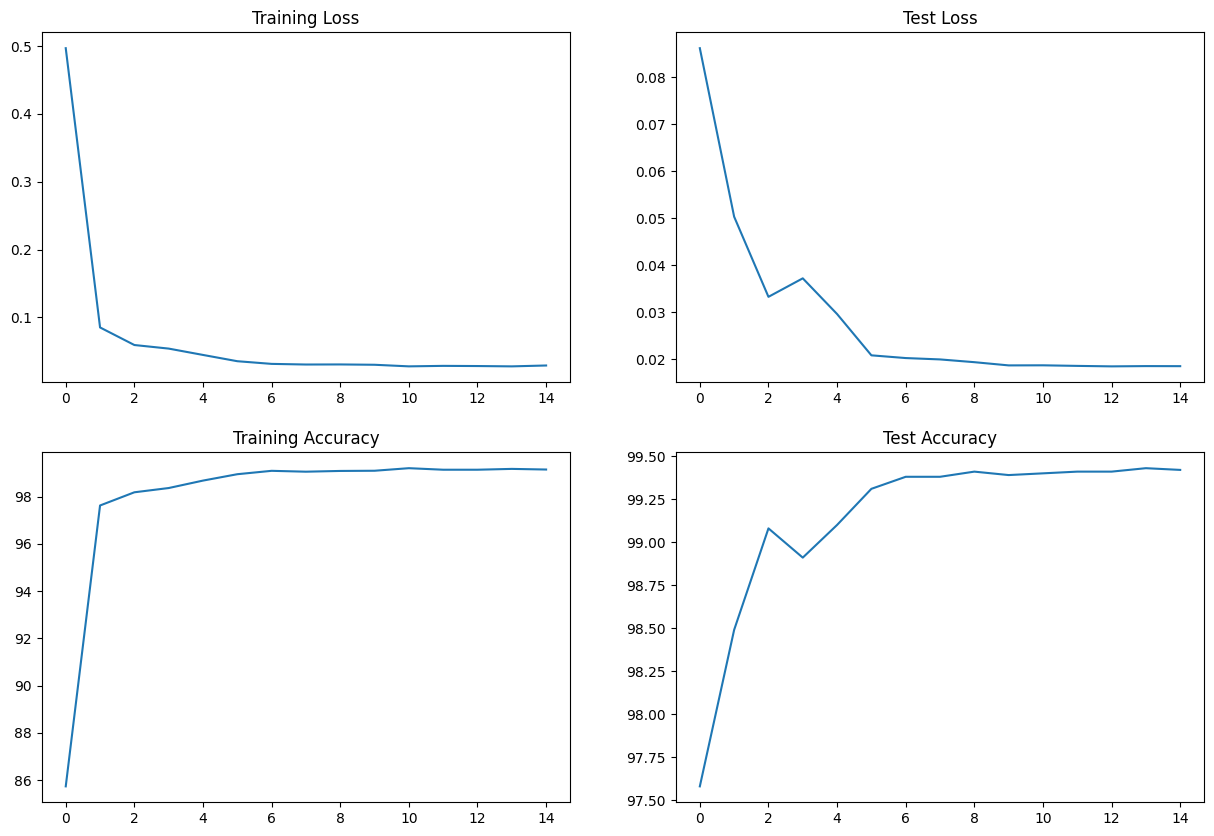

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()